In [1]:
import sys
sys.path.append('../')

from cogsci2017.environment.arm_diva_env import CogSci2017Environment
from cogsci2017.learning.supervisor import Supervisor
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

iterations = 50000

environment = CogSci2017Environment(gui=False, audio=False)


config = dict(m_mins=environment.conf.m_mins,
             m_maxs=environment.conf.m_maxs,
             s_mins=environment.conf.s_mins,
             s_maxs=environment.conf.s_maxs)

agent = Supervisor(config, model_babbling="random", n_motor_babbling=1000, explo_noise=0.05)



human sounds ['eyu', 'iuo', 'yeo', 'eou', 'uye', 'oey']


In [2]:
for i in range(iterations):
    if i % (iterations/10) == 0:
        print "Iteration", i
    context = environment.get_current_context()
    m = agent.produce(context)
    s = environment.update(m)
    agent.perceive(s)
#    s_traj = environment.diva_traj
#    if s_traj is not None:
#        if i < 100:
#            plt.plot([-f[1] for f in s_traj], [-f[0] for f in s_traj], color="r", alpha=0.2)
#        else:
#            plt.plot([-f[1] for f in s_traj], [-f[0] for f in s_traj], color="b", alpha=0.2)
#            
#plt.xlim([-11.25,-9.5])
#plt.ylim([-9.25, -7.5])

Iteration 0


../cogsci2017/environment/diva/diva.py:169: RuntimeWarning: invalid value encountered in log2
  formants = log2(transpose(res[self.s_used,:]))


best_vocal_errors [('eyu', 0.75648746195270467), ('iuo', 0.8973188120579163), ('yeo', 0.64862608909481057), ('eou', 0.77818403432942462), ('uye', 0.96203635100893448), ('oey', 0.65152678597883618)]

----------------
Agent Statistics
----------------

#Iterations: 1000

# Chosen module mod1 : 0
# Chosen module mod2 : 0
# Chosen module mod3 : 0
# Chosen module mod4 : 0
# Chosen module mod5 : 0
# Chosen module mod6 : 0
# Chosen module mod10 : 0
# Chosen module mod11 : 0
# Chosen module mod12 : 0
# Chosen module mod13 : 0

Competence progress of mod1  :  0.0
Competence progress of mod2  :  0.0
Competence progress of mod3  :  0.0
Competence progress of mod4  :  0.0
Competence progress of mod5  :  0.0
Competence progress of mod6  :  0.0
Competence progress of mod10 :  0.0
Competence progress of mod11 :  0.0
Competence progress of mod12 :  0.0
Competence progress of mod13 :  0.0

Prediction progress of mod1  :  0.0
Prediction progress of mod2  :  0.0
Prediction progress of mod3  :  0.0
Predic

error oiy 0.787985083408


(-9.25, -7.5)

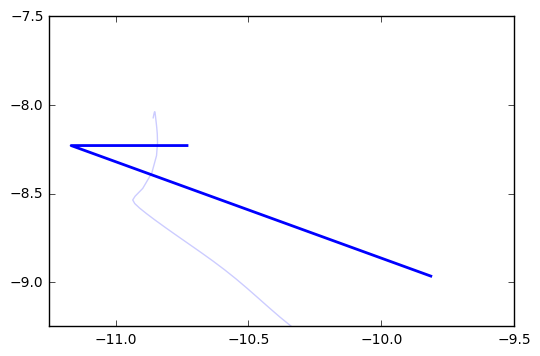

In [4]:
#for hs in human_sounds:
hs = "oiy"
agent.modules["mod13"].sm.sigma_expl = np.array([0.1]*28)
#print agent.modules["mod13"].sm.sigma_expl
m = agent.modules["mod13"].inverse(np.array(environment.human_sounds_traj_std[hs]), explore=True) 
#print m
s = environment.update([0.]*21 + list(m))
s_traj = environment.diva_traj
#print s_traj
error = np.linalg.norm(np.array(environment.human_sounds_traj[hs]) - np.array([f[0] for f in s_traj[[0, 12, 24, 37, 49]]] + [f[1] for f in s_traj[[0, 12, 24, 37, 49]]]))
print "error", hs, error


plt.plot([-f[1] for f in s_traj], [-f[0] for f in s_traj], color="b", alpha=0.2)    
plt.plot(- np.array(environment.human_sounds_traj[hs][5:]), -np.array(environment.human_sounds_traj[hs][:5]), lw=2)

plt.xlim([-11.25,-9.5])
plt.ylim([-9.25, -7.5])

In [3]:

for i in range(100):
    context = environment.get_current_context()[:4]
    s_goal = [2. * np.random.random() - 1. for _ in range(10)]

    m = agent.modules["mod10"].inverse(np.array(context + s_goal), explore=True)
    m = [0.] * 21 + list(m)
    s = environment.update(m)
    if environment.produced_sound:
        print environment.produced_sound
    agent.perceive(s)

In [3]:
print agent.modules["mod10"].sm.model.imodel.fmodel.dataset.data[1]

[]


human sounds ['iuo', 'uye', 'yeo', 'eou', 'oey', 'eyu']

region 1

toy1
goal 0 [-0.80436930727172096, -0.56305851509020466, -0.40218465363586048, -0.16087386145434415, -0.0, 1.2697801188536881, 0.88884608319758163, 0.63489005942684407, 0.25395602377073756, 0.0]
context [-0.5, 0.0, -0.80436930727172096, 1.2697801188536881]
arm dist 1.45145802823
diva_dist inf


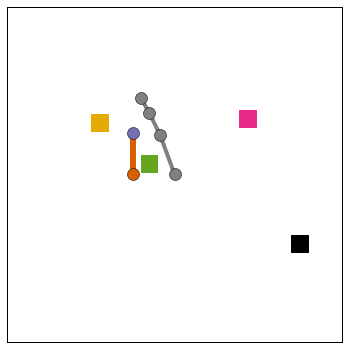

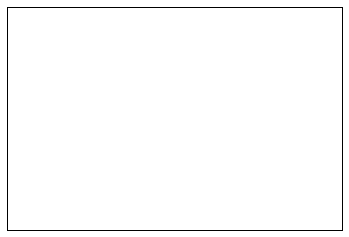

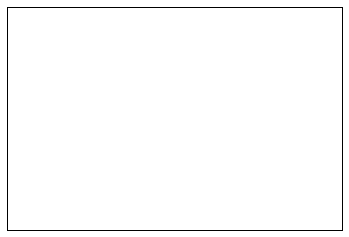

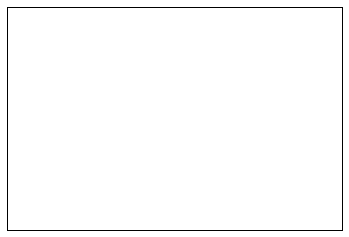

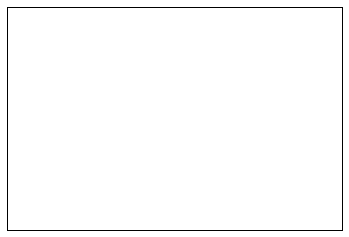

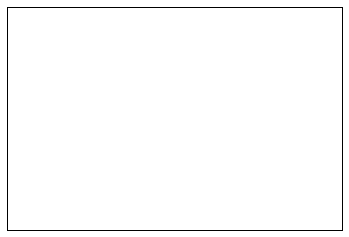

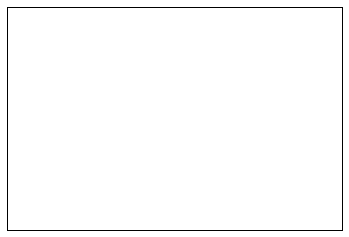

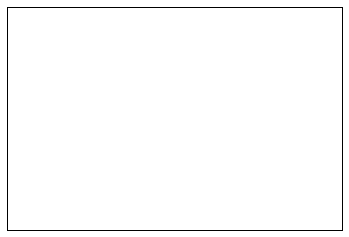

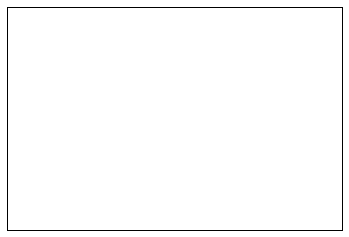

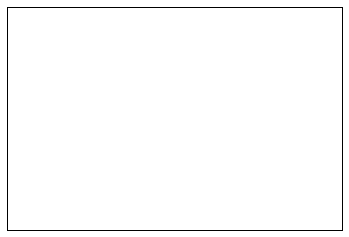

s [-0.25        0.          0.43580389  0.33193459 -0.15369869  0.06360151
 -0.45065051  0.30788165  0.74430273 -0.41298318 -0.20141226 -0.16904561
 -0.48339487  0.10593664  0.36638111  0.45642781 -0.41678857  0.12577877
  0.46116432  0.23046742 -0.25       -0.25       -0.25       -0.25       -0.25
  0.          0.          0.          0.          0.          0.43580389
  0.43580389  0.43580389  0.43580389  0.43580389  0.33193459  0.33193459
  0.33193459  0.33193459  0.33193459 -0.15369869 -0.15369869 -0.15369869
 -0.15369869 -0.15369869  0.06360151  0.06360151  0.06360151  0.06360151
  0.06360151 -0.45065051 -0.45065051 -0.45065051 -0.45065051 -0.45065051
  0.30788165  0.30788165  0.30788165  0.30788165  0.30788165  0.14385619
 -0.06366256 -0.27118131 -0.27118131 -0.27118131  0.85328781  0.66730342
  0.48131903 -0.06241239 -0.60614381  0.74430273  0.74430273  0.74430273
  0.74430273  0.74430273 -0.41298318 -0.41298318 -0.41298318 -0.41298318
 -0.41298318]
reached [ 0.43580389  0.43580

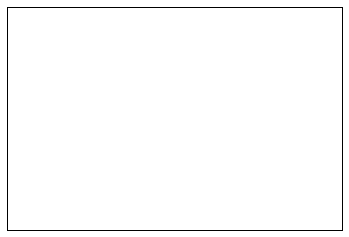

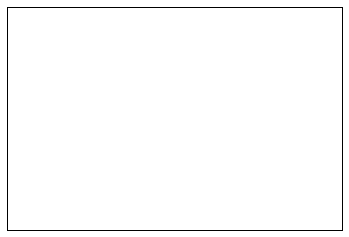

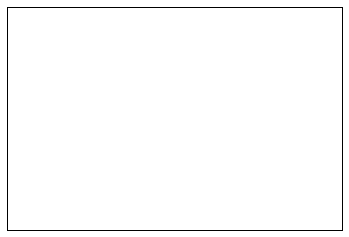

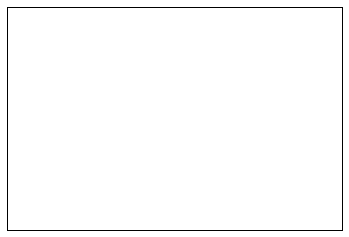

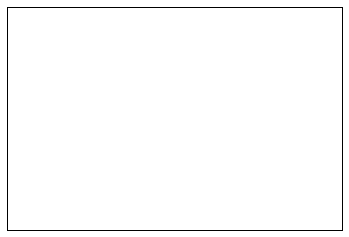

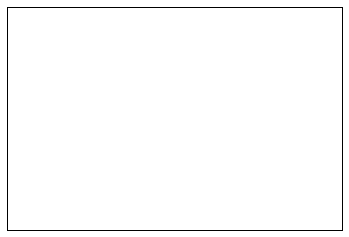

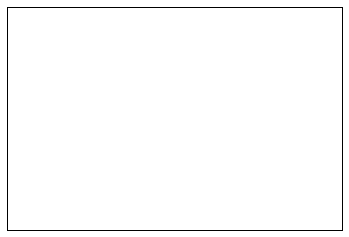

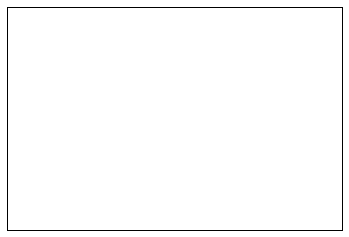

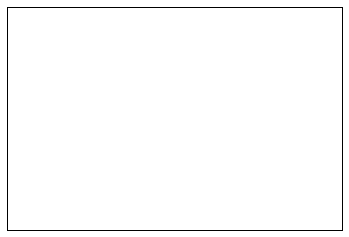

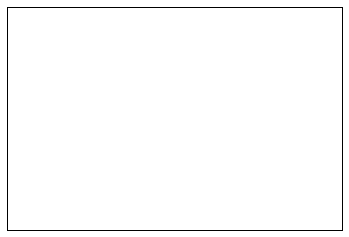

s [-0.25        0.          0.43580389  0.33193459 -0.15369869  0.06360151
 -0.45065051  0.30788165 -0.49199948 -0.43571431  0.03827298 -0.1903108
  0.02848198 -0.07737439  0.15669484  0.49307462 -0.22678518  0.03702156
 -0.09806272 -0.21268974 -0.25       -0.25       -0.25       -0.25       -0.25
  0.          0.          0.          0.          0.          0.43580389
  0.43580389  0.43580389  0.43580389  0.43580389  0.33193459  0.33193459
  0.33193459  0.33193459  0.33193459 -0.15369869 -0.15369869 -0.15369869
 -0.15369869 -0.15369869  0.06360151  0.06360151  0.06360151  0.06360151
  0.06360151 -0.45065051 -0.45065051 -0.45065051 -0.45065051 -0.45065051
  0.30788165  0.30788165  0.30788165  0.30788165  0.30788165  0.46578428
  0.30482024  0.14385619 -0.06366256 -0.27118131 -0.43621881  0.2085345
  0.85328781  0.66730342  0.48131903 -0.49199948 -0.49199948 -0.49199948
 -0.49199948 -0.49199948 -0.43571431 -0.43571431 -0.43571431 -0.43571431
 -0.43571431]
reached [-0.15369869 -0.1536986

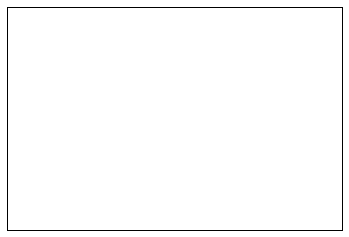

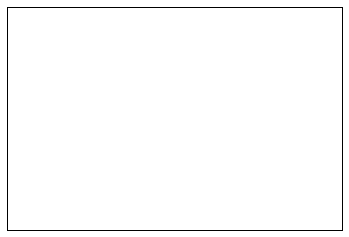

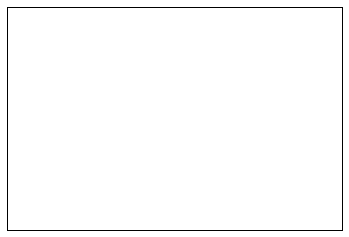

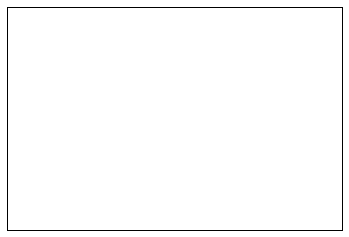

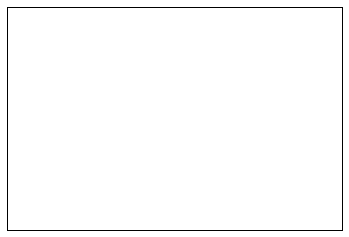

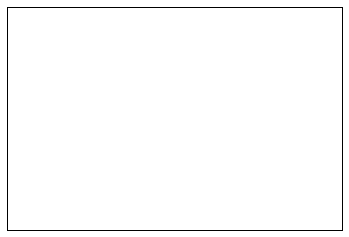

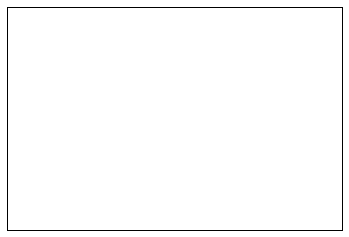

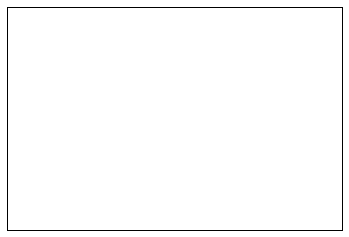

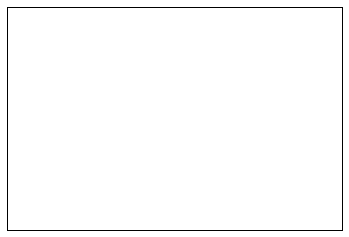

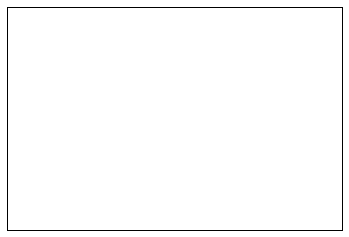

s [ -2.50000000e-01   0.00000000e+00   4.35803892e-01   3.31934591e-01
  -1.53698687e-01   6.36015122e-02  -4.50650508e-01   3.07881653e-01
   4.85046655e-01  -4.24290372e-01   3.06161700e-17   3.06161700e-17
   3.06161700e-17   3.06161700e-17   3.06161700e-17   5.00000000e-01
   5.00000000e-01   5.00000000e-01   5.00000000e-01   5.00000000e-01
  -2.50000000e-01  -2.50000000e-01  -2.50000000e-01  -2.50000000e-01
  -2.50000000e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   4.35803892e-01   4.35803892e-01
   4.35803892e-01   4.35803892e-01   4.35803892e-01   3.31934591e-01
   3.31934591e-01   3.31934591e-01   3.31934591e-01   3.31934591e-01
  -1.53698687e-01  -1.53698687e-01  -1.53698687e-01  -1.53698687e-01
  -1.53698687e-01   6.36015122e-02   6.36015122e-02   6.36015122e-02
   6.36015122e-02   6.36015122e-02  -4.50650508e-01  -4.50650508e-01
  -4.50650508e-01  -4.50650508e-01  -4.50650508e-01   3.07881653e-01
   3.07881653e-01   3.07881653e-

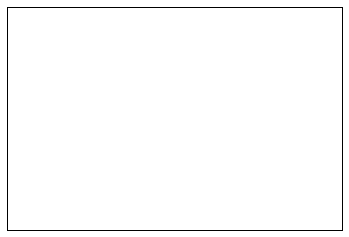

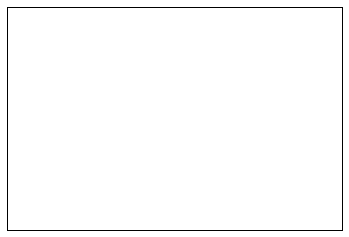

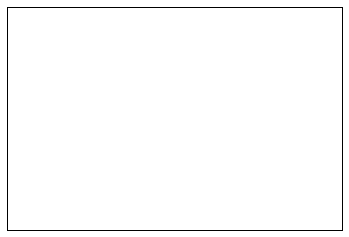

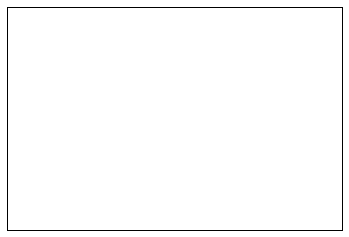

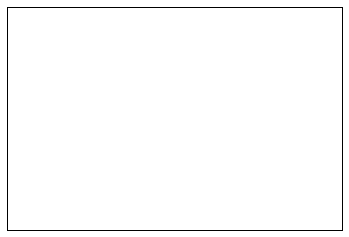

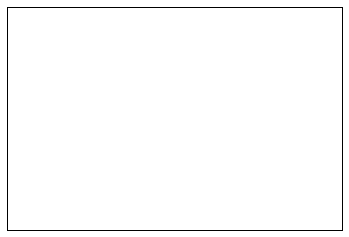

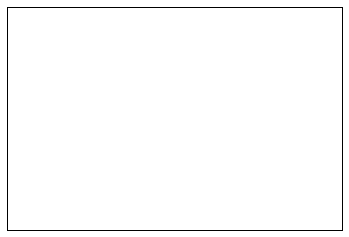

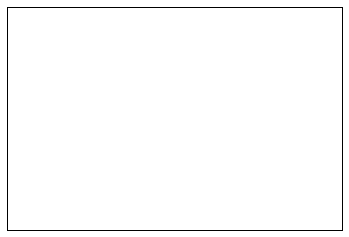

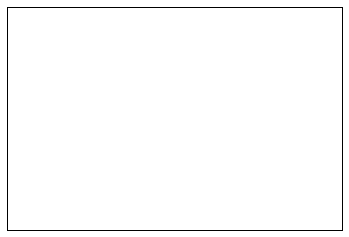

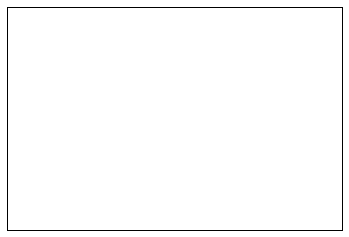

s [ -2.50000000e-01   0.00000000e+00   7.36026497e-01  -2.64760296e-01
  -2.97429645e-04   1.10083913e-04  -6.66944679e-01  -3.09796975e-01
  -3.28213996e-01  -6.96109452e-02   2.39178569e-01   2.15799330e-01
   9.60435189e-02   4.16725393e-01   2.48955002e-01   4.28283866e-01
   4.23354999e-01  -2.84481745e-01   2.09376624e-01  -3.70035820e-01
  -2.50000000e-01  -2.50000000e-01  -2.50000000e-01  -2.50000000e-01
  -2.50000000e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.36026497e-01   7.36026497e-01
   7.36026497e-01   7.36026497e-01   7.36026497e-01  -2.64760296e-01
  -2.64760296e-01  -2.64760296e-01  -2.64760296e-01  -2.64760296e-01
  -2.97429645e-04  -2.97429645e-04  -2.97429645e-04  -2.97429645e-04
  -2.97429645e-04   1.10083913e-04   1.10083913e-04   1.10083913e-04
   1.10083913e-04   1.10083913e-04  -6.66944679e-01  -6.66944679e-01
  -6.66944679e-01  -6.66944679e-01  -6.66944679e-01  -3.09796975e-01
  -3.09796975e-01  -3.09796975e-

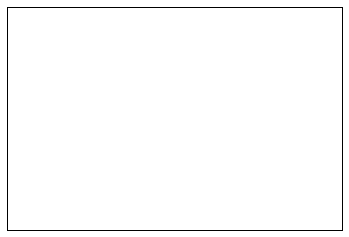

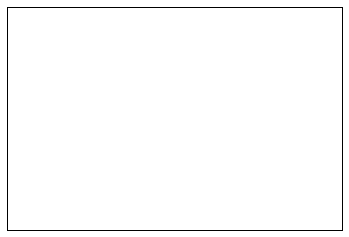

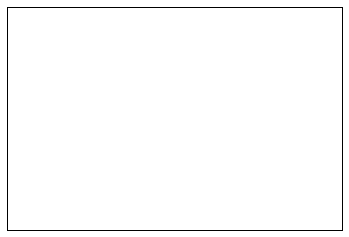

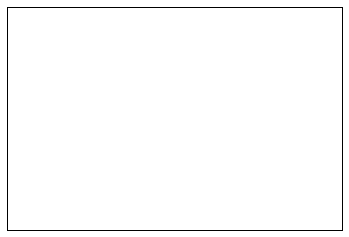

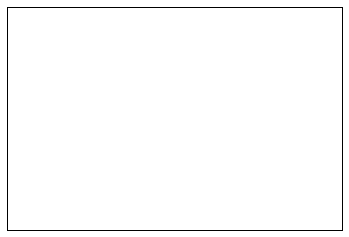

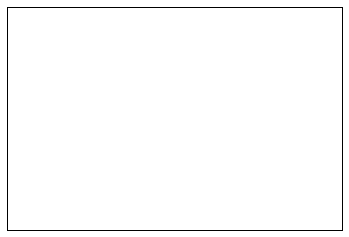

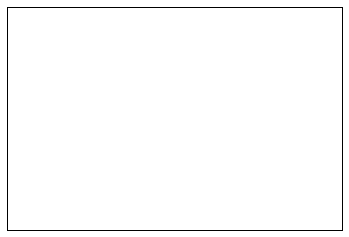

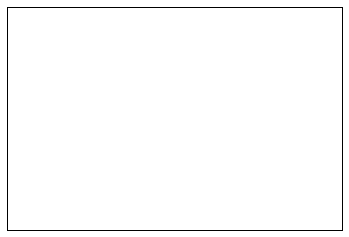

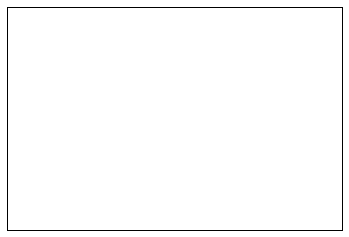

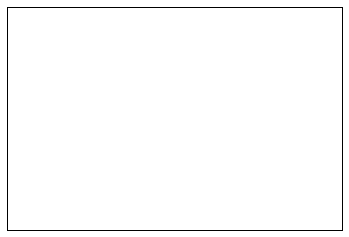

s [ -2.50000000e-01   0.00000000e+00   7.36026497e-01  -2.64760296e-01
  -2.97429645e-04   1.10083913e-04  -6.66944679e-01  -3.09796975e-01
   1.71445778e-01  -8.83488092e-01   2.29700791e-01  -2.33576318e-01
   1.92569910e-02  -3.35567286e-02   2.28046840e-02   4.39269492e-01
  -1.83334891e-01  -2.08516223e-03  -2.63900849e-02  -2.31940167e-01
  -2.50000000e-01  -2.50000000e-01  -2.50000000e-01  -2.50000000e-01
  -2.50000000e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   7.36026497e-01   7.36026497e-01
   7.36026497e-01   7.36026497e-01   7.36026497e-01  -2.64760296e-01
  -2.64760296e-01  -2.64760296e-01  -2.64760296e-01  -2.64760296e-01
  -2.97429645e-04  -2.97429645e-04   1.92569910e-02  -3.35567286e-02
   2.28046840e-02   1.10083913e-04   1.10083913e-04  -2.08516223e-03
  -2.63900849e-02  -2.31940167e-01  -6.66944679e-01  -6.66944679e-01
  -6.66944679e-01  -6.66944679e-01  -6.66944679e-01  -3.09796975e-01
  -3.09796975e-01  -3.09796975e-

KeyboardInterrupt: 

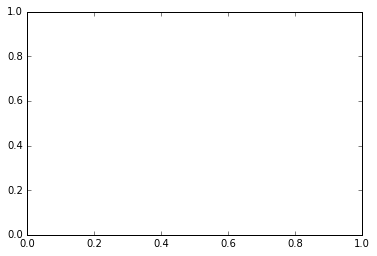

In [8]:
# TEST EVAL
environment = CogSci2017Environment(gui=True, audio=True)

n_goals = 10

eval_results = {}

for region in [1, 2, 3]:  
    print
    print "region", region
    eval_results[region] = {}
    for i in range(n_goals):
        eval_results[region][i] = {}
        environment.reset_toys()
        for toy in ["toy1", "toy2", "toy3"]:
            print
            print toy
            eval_results[region][i][toy] = {}
                                    
            if toy == "toy1":
                goal = [environment.current_toy1[0] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]] + \
                       [environment.current_toy1[1] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]]
                arm_mid = "mod3"
                diva_mid = "mod10"
            elif toy == "toy2":
                goal = [environment.current_toy2[0] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]] + \
                       [environment.current_toy2[1] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]]
                arm_mid = "mod4"
                diva_mid = "mod11"
            elif toy == "toy3":
                goal = [environment.current_toy3[0] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]] + \
                       [environment.current_toy3[1] * (1. - t) / 2. for t in [0., 0.3, 0.5, 0.8, 1.]]
                arm_mid = "mod5"
                diva_mid = "mod12"
                
            print "goal", i, goal
            context = list(agent.modules[arm_mid].get_c(environment.get_current_context()))
            print "context", context
            dists, _ = agent.modules[arm_mid].sm.model.imodel.fmodel.dataset.nn_y(context+goal)
            arm_dist = dists[0]
            
            if len(agent.modules[diva_mid].sm.model.imodel.fmodel.dataset) > 0:
                context = list(agent.modules[diva_mid].get_c(environment.get_current_context()))
                dists, _ = agent.modules[diva_mid].sm.model.imodel.fmodel.dataset.nn_y(context+goal)
                diva_dist = dists[0]
            else:
                diva_dist = np.inf
            
            print "arm dist", arm_dist
            print "diva_dist", diva_dist
            
            if arm_dist < diva_dist:
                m = agent.modules[arm_mid].inverse(np.array(context + goal), explore=False)            
                m = list(m) + [0.]*28
            else:
                m = agent.modules[diva_mid].inverse(np.array(context + goal), explore=False)            
                m = [0.]*21 + list(m)
                
            s = environment.update(m)
            print "s", s
            
            if toy == "toy1":
                reached = s[30:40]
            elif toy == "toy2":
                reached = s[40:50]
            elif toy == "toy3":
                reached = s[50:60]
                
            comp_error = np.linalg.norm(np.array(reached) - np.array(goal))
            print "reached", reached, "error", comp_error
            
            eval_results[region][i][toy]["comp_error"] = comp_error
            eval_results[region][i][toy]["arm_dist"] = arm_dist
            eval_results[region][i][toy]["diva_dist"] = diva_dist

In [11]:
print eval_results

{1: {0: {'toy1': {'comp_error': 2.0112510116968036, 'diva_dist': inf, 'arm_dist': 2.3457249350085694}, 'toy2': {'comp_error': 1.3587584670649857, 'diva_dist': inf, 'arm_dist': 2.0959802722687857}, 'toy3': {'comp_error': 0.83962648372889959, 'diva_dist': inf, 'arm_dist': 1.067479024620348}}, 1: {'toy1': {'comp_error': 0.61682910402519109, 'diva_dist': inf, 'arm_dist': 0.93724661873664306}, 'toy2': {'comp_error': 1.2557097513243816, 'diva_dist': inf, 'arm_dist': 2.1249736656206091}, 'toy3': {'comp_error': 1.1683655917824638, 'diva_dist': inf, 'arm_dist': 1.853937545371928}}, 2: {'toy1': {'comp_error': 0.83000389630299343, 'diva_dist': inf, 'arm_dist': 1.0404701259740263}, 'toy2': {'comp_error': 0.23034725196923253, 'diva_dist': inf, 'arm_dist': 0.45640730499320403}, 'toy3': {'comp_error': 0.86429945780649498, 'diva_dist': inf, 'arm_dist': 0.99413912480418676}}, 3: {'toy1': {'comp_error': 1.0880989139179567, 'diva_dist': inf, 'arm_dist': 1.4539604993783701}, 'toy2': {'comp_error': 0.65195